## Tasks
Assigned to Sierra Stevenson, JSIP intern under Dr. Jonathan Jiang and Dr. Longtao Wu<p>
This analysis is intended to compare observed (MLS/AIRS/GPM_MERGIR) and simulated (UM) data to evaluate<br>how convection is resolved by storm-resolving models.

List of Tasks<p>
[DONE]&nbsp;&nbsp;&nbsp;Task 1 — UM moisture at 100 hPa map<br>
[DONE]&nbsp;&nbsp;&nbsp;Task 2 — MLS moisture at 100 hPa map<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Task 3 — UM/MLS/AIRS vert. profiles pressure vs temp/moisture<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Task 4 — UM/MLS PDFs (moisture)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Task 5 — UM/GPM_MERGIR PDFs (brightness temp)

## Code
Setup

In [31]:
import metpy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import scipy.stats as sst
import dask
import os
import glob
import below_god as bg
import seaborn as sns

from metpy.interpolate import log_interpolate_1d
from metpy.units import units
from netCDF4 import MFDataset, Dataset, num2date
from pydap.client import open_url

In [32]:
# Folder containing data
path = "/nas/bigdata_static/longtaow/"

# Conversion factors
hPa_to_Pa = 100
kgkg_to_ppmv = 1.608 * 10 ** 6

UM data

In [33]:
# Read in data
UM_data_prs = xr.open_mfdataset(path+'DYAMOND/Monsoon/pfull/*.nc', parallel=True)   # Pressure (Pa)

# Average across time
UM_avg_prs = UM_data_prs.mean(dim='time')     # Pressure

# Get lat and lon for mapping
UM_lat = UM_data_prs['latitude'][:]
UM_lon = UM_data_prs['longitude'][:]

In [34]:
# Save lat and lon files
np.save("UM_lat", UM_lat)
np.save("UM_lon", UM_lon)

MLS data

In [9]:
# Read in MLS monthly data
MLS_data = xr.open_mfdataset(path+'MLS_monthly/H2O/MLS_H2O*08.nc', concat_dim='time', combine='nested').squeeze().rename({'dim1_H2OAVG':'Pressure','dim3_H2OAVG':'Lat','dim2_H2OAVG':'Lon'})

# Temporal average
MLS_data_avg = MLS_data.mean(dim='time')

# Isolate by data variable
MLS_prs = MLS_data_avg['PRESSURE'].values
MLS_h2o = MLS_data_avg['H2OAVG'] * kgkg_to_ppmv

# Pressure index for 100 hPa
prs_idx = 12

# Isolate MLS moisture data by pressure index (100 hPa) and convert units from kg/kg to ppmv
MLS_h2o100 = MLS_h2o.sel(Pressure=prs_idx).values

# Save isobaric moisture data into NumPy file
np.save("MLS_h2o100", MLS_h2o100)

# Lat and lon values for plotting
MLS_lat = MLS_data_avg['LAT']
MLS_lon = MLS_data_avg['LON']

Get saved data

In [15]:
UM_hus100 = np.load('/users/smsteven/Tasks/Files/UM_hus_100hPa.npy')

### Figures

In [16]:
# All
date_range = "08/11/2016 — 09/08/2016"

# UM
UM_name = "Unified Model"

# MLS
MLS_dates = "08/2004 — 08/2022"
MLS_name = "MLS"

# GPM_MERGIR
GPM_name = "GPM_MERGIR Data"

Functions for figure creation

In [19]:
from matplotlib import colorbar, colors

In [39]:
# Geographic map

def CreateMap(moisture_arr=MLS_h2o100, lat=MLS_lat, lon=MLS_lon, arr_title=MLS_name, date_range=date_range, prs_hPa="100"):
    # Set up our projection
    crs = ccrs.PlateCarree()

    # Create the figure and grid for subplots
    fig = plt.figure(figsize=(8, 6))

    # Plot 100 hPa
    ax = plt.subplot(111, projection=crs)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.set_extent([-179.99999,180,-10,50])  # TODO: Look at this

    # Contour moisture
    cf = ax.contourf(lon, lat, moisture_arr, cmap=plt.cm.RdBu, levels=100,
                    transform=ccrs.PlateCarree(), vmin=4)
    cb = fig.colorbar(cf, orientation='horizontal', aspect=65, shrink=0.75, pad=0.05,
                    extendrect='True')


    # Make the axis title
    ax.set_title(f"{arr_title}: Moisture (ppmv) at {prs_hPa} hPa averaged for {date_range}", loc='center', fontsize=14, pad=8)
    plt.show()

Task 1 and 2: UM, MLS moisture at 100 hPa

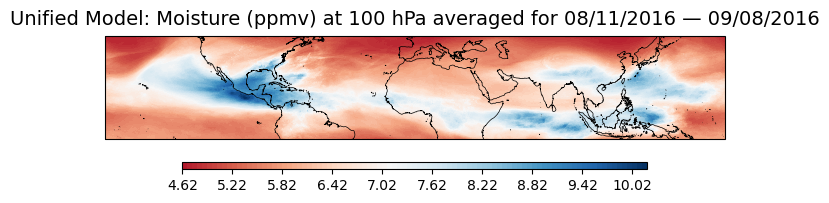

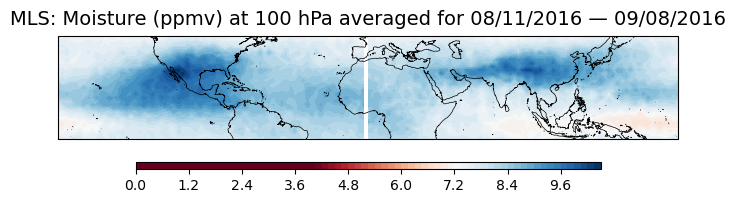

In [40]:
# Moisture at 100 hPa (UM)
CreateMap(UM_hus100,  UM_lat,  UM_lon,  UM_name, date_range, 100)

# Moisture at 100 hPa (MLS)
# CreateMap(MLS_h2o100)

# Mean moisture values
# print("Mean value\nUM:", np.mean(UM_hus100),"\nMLS:", np.mean(MLS_h2o100))

Task 3: Vertical profiles of pressure vs. temperature/moisture (UM, MLS)

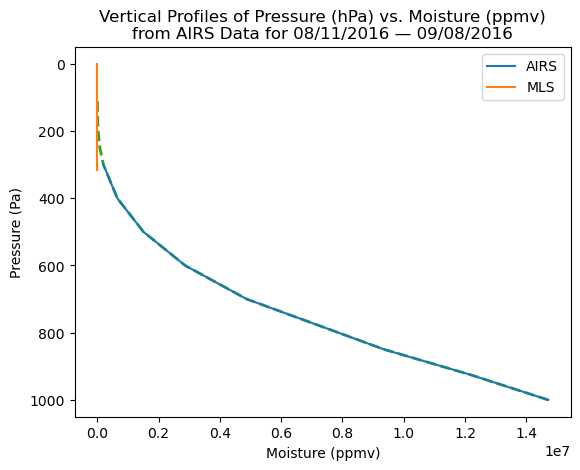

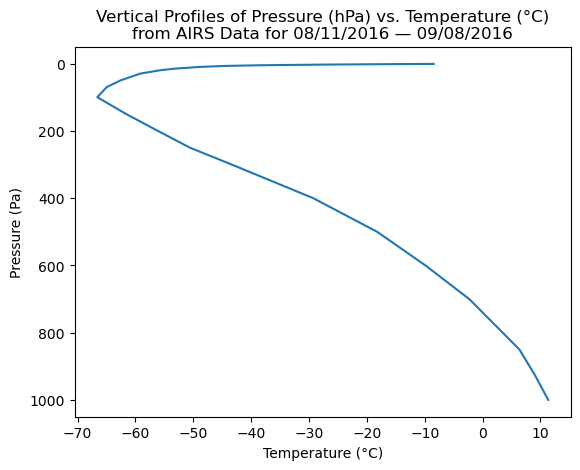

In [ ]:
# Pressure vs. Moisture (MLS/AIRS)
CreateVertProfile(AIRS_h2o_over300, AIRS_h2o_prs[AIRS_prs_idxs_over300], MLS_h2o_under300, MLS_prs[MLS_prs_idxs_under300] * hPa_to_Pa, full_AIRS=True)

# Pressure vs. Temperature  (AIRS)
CreateVertProfile(AIRS_t-273.15, AIRS_t_prs, data_label="Temperature")

Task 4: PDFs of moisture at 100 hPa (UM, MLS)

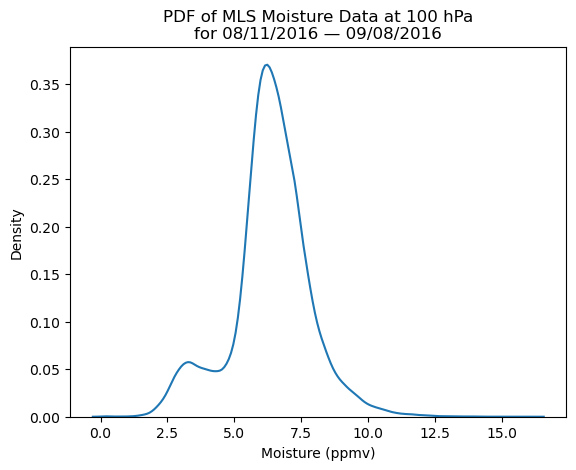

In [ ]:
# Moisture at 100 hPA PDF (MLS)
CreatePDF(MLS_h2o100_hrly_flat)

# TODO: Moisture at 100 hPA PDF (UM)
# CreatePDF(UM_h2o100_hrly_flat)

Task 5: PDFs of brightness temperature data (UM OLR, GPM_MERGIR)

In [ ]:
# TODO see task5 file